# Using AI and Machine Learning to Predict Consumer Behavior

Companies understand that predicting customer behavior fills the gap in the markets and identifies products that are needed and which could generate bigger revenue.

Consumer behavior prediction can be done by:

- **Segmentation**: separating customers into smaller groups based on buying behaviors. This helps in the separation of concerns, which in turn helps us identify the region of the market.
- **Predictive Analytics**: we use statistical techniques to analyze previous historical data to predict the future behavior of customers.

# Data
In this dataset, we have information related to customers:

- **CustomerID** - ID of the customer
- **Gender** - Gender of the customer
- **Age** - Age of the customer
- **AnnualIncome** - annual income of the customer
- **SpendingScore** - score assigned based on the customer’s behavior and their purchasing data

You can get tha dataset her: [Mall_Customers.csv](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python)

In [ ]:
# Install
!pip3 install sklearn
!pip3 install KMeans

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import sklearn
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Data visualizations
## Correlation between Age, Income and Spending scores
A strategy to marketing is to analyze the spending patterns.

Try to analyze and find how age, annual incomes and spending scores of the customers are.

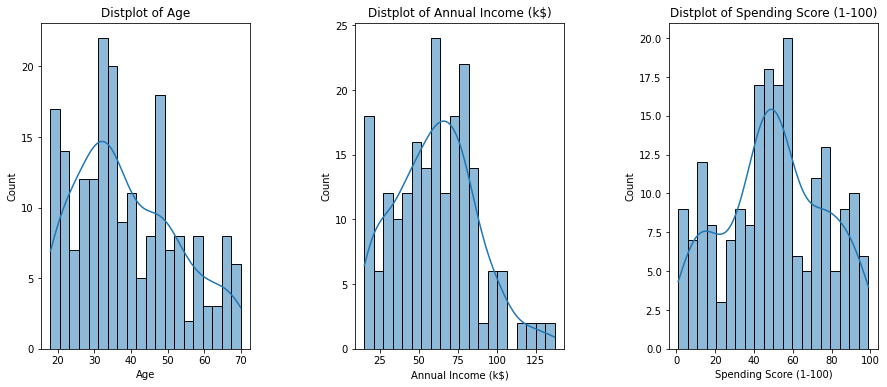

In [3]:
# Distribution plots of Age, Annual Income, and Spending scores
plt.figure(1 , figsize = (15 , 6)) # Dimensions of image
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    
    plt.subplot(1 , 3 , n) # Creates 3 different sub-plots
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.histplot(df[x] , bins = 20, kde=True) # Creates a distribution plot
    
    plt.title('Distplot of {}'.format(x)) # Sets title for each plot

plt.show()

## Gender analysis
The second most important thing in deciding the strategy, to analyze the spending patterns based on Gender.

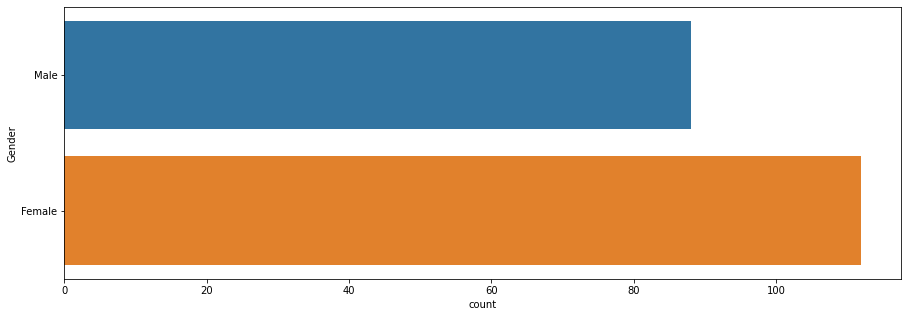

In [4]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Gender' , data = df)
plt.show()

 We find that Females tend to purchase more than Males do.

# Customer segmentation
Segmentation helps in dividing a set of large data into groups of smaller observations that are similar in specific ways relevant to marketing.

Each group contains individuals that are similar in-between themselves, and different from individuals from the other groups.

Segmentation is widely used as a marketing tool to create clusters of clients and adapt a relevant strategy for each of them.

## Segmentation using Age and Spending score
Segment the customers based on their age and their spending scores. This helps us understand the age category of the customers, which could possibly improve spending score, thereby increasing the revenue for the company.

Here, we have to decide the possible number of clusters (segments) that would return the best results. To do that, we loop through 1 to 11, and find which cluster would be the right choice.

In [5]:
X_age_spending = df[['Age' , 'Spending Score (1-100)']].iloc[: , :].values # extracts only age and spending score information from the dataframe
inertia = []

In [ ]:
X_age_spending

In [7]:
for n in range(1 , 11):
    model_1 = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 , max_iter=300, 
                      tol=0.0001,  random_state= 111  , algorithm='full')) # use predefined Kmeans algorithm
    model_1.fit(X_age_spending) # fit the data into the model
    inertia.append(model_1.inertia_)

## Visualize as graph

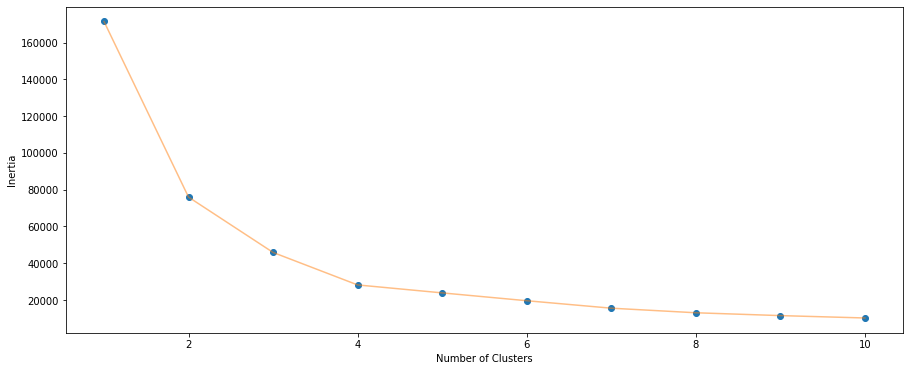

In [8]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o') # Mark the points with a solid circle
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5) # Connect remaining points with a line
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

Notice that after cluster 4, the line graph starts becoming stable.

This method is known as Elbow method.

Explore more with 4 clusters.

In [18]:
model_2 = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') ) # set number of clusters as 4
model_2.fit(X_age_spending) # fit the model
labels1 = model_2.labels_
centroids1 = model_2.cluster_centers_

## Visualize as graph
Before printing the graph we set:

- maximum
- minimum
- initializing a meshgrid()

In [19]:
h = 0.02
x_min, x_max = X_age_spending[:, 0].min() - 1, X_age_spending[:, 0].max() + 1
y_min, y_max = X_age_spending[:, 1].min() - 1, X_age_spending[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model_2.predict(np.c_[xx.ravel(), yy.ravel()])  # returns flattened 1D array

### Plot the graph
### KMeans with 4 clusters

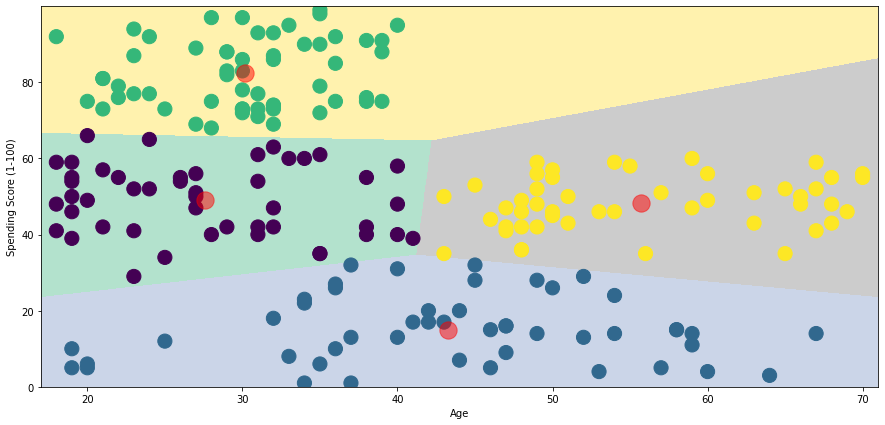

In [20]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age' ,y = 'Spending Score (1-100)' , data = df , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()

From this plot, we can get information about the spending patterns:

- The average spending score irrespective of age would be around 20
- In the topmost cluster, Customers below age 40 has the highest spending scores. The cluster is less sparse.
- Above age 40, the spending score remains consistently within the range of 30 - 60.